# 🎬 Netflix Titles Data Analysis with Python
This project is an exploratory data analysis (EDA) and visualization of the Netflix Titles dataset, using Python libraries like pandas, matplotlib, and seaborn. It focuses on uncovering trends in the types of content, countries of production, genres, and Netflix's growth over time.

## 📊 1. Data Loading and Initial Exploration


In [1]:
import pandas as pd
import os
file_path = 'C:/Users/hanib/OneDrive/Desktop/netflix_titles.csv'
df = pd.read_csv(file_path)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📁 Dataset Information

The dataset contains information on Netflix titles including:
- Title, type (Movie/TV Show)
- Director, cast
- Country of production
- Release year and date added to Netflix
- Rating, duration, and genres

I'll clean missing values and analyze content trends.


In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 🧹Data Cleaning

In [3]:
#Data Cleaning
df.dropna(subset=['country', 'date_added', 'rating'], inplace=True)
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

## 📈 Exploratory Data Analysis


## 🎥  Movie Duration Distribution
 # a) Total content over the years

Text(0, 0.5, 'Number of Titles')

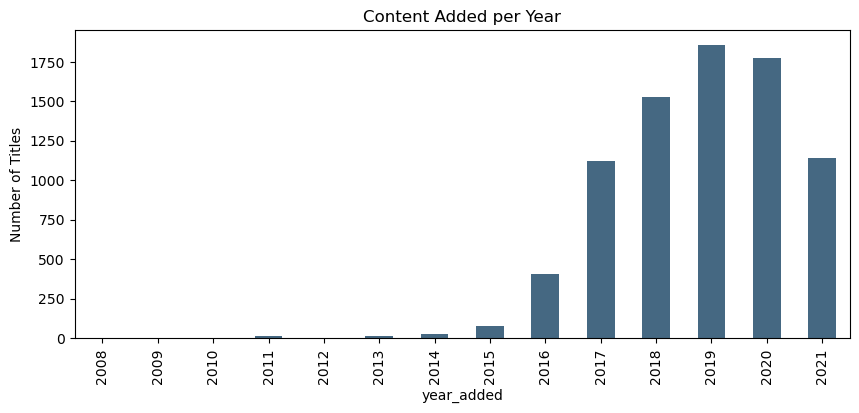

In [4]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
df['year_added'].value_counts().sort_index().plot(kind='bar',color='#456882', figsize=(10, 4), title='Content Added per Year')
plt.ylabel('Number of Titles')

# b) Movies vs TV Shows

<Axes: title={'center': 'Movies vs TV Shows'}>

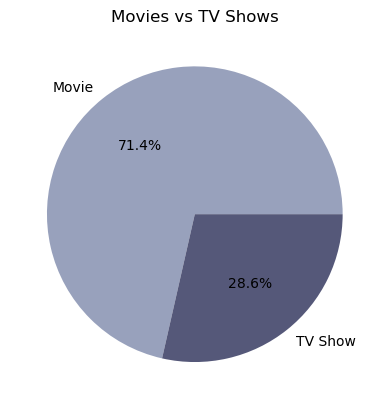

In [5]:

df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Movies vs TV Shows',
    ylabel='',
    colors=['#98A1BC','#555879'])

# c) Top 10 countries with most content

<Axes: title={'center': 'Top Countries on Netflix'}, xlabel='country'>

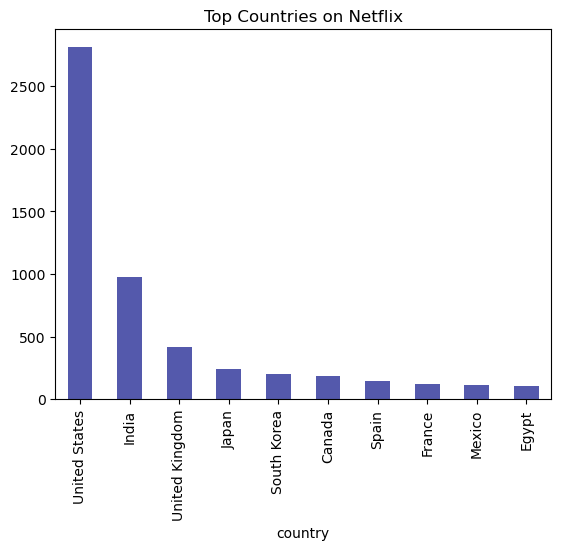

In [6]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar',color='#5459AC', title='Top Countries on Netflix')

# d) Duration Distribution (Movies)

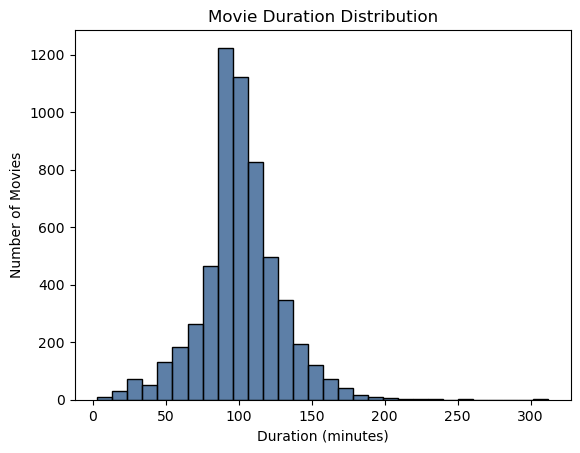

In [7]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_minutes'] = movie_df['duration'].str.extract(r'(\d+)').astype(float)
sns.histplot(movie_df['duration_minutes'], color='#27548A', bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


# e) Most Common Genres

Text(0.5, 1.0, 'Most Common Genres')

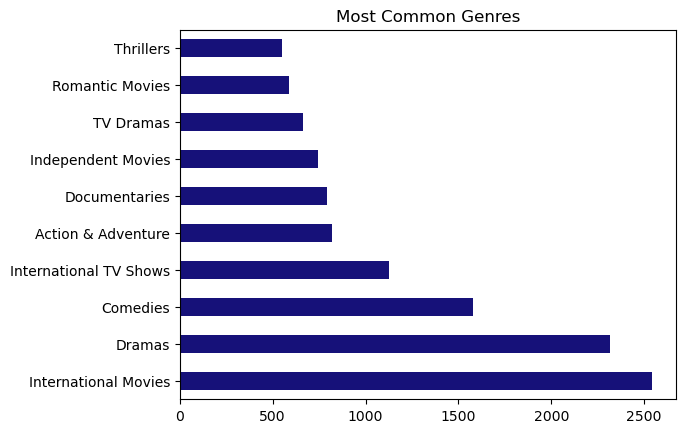

In [8]:
from collections import Counter
all_genres = ','.join(df['listed_in']).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='barh',color='#161179')
plt.title("Most Common Genres")
